In [25]:
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [26]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

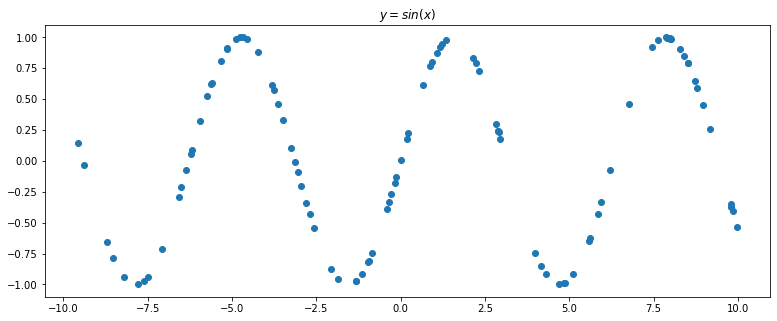

In [27]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10

y_train = torch.sin(x_train)

plt.plot(x_train, y_train, 'o')
plt.title('$y = sin(x)$');
plt.show()

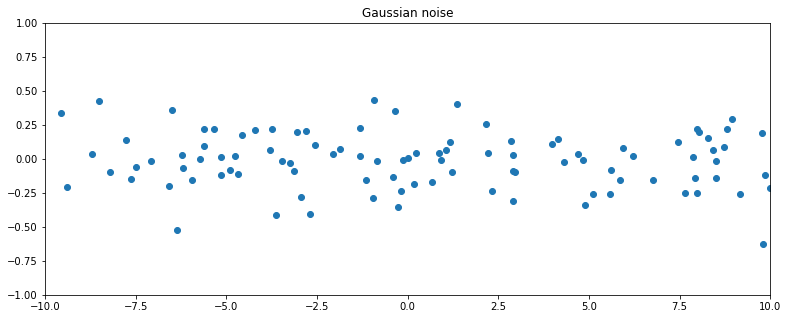

In [28]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train, noise, 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

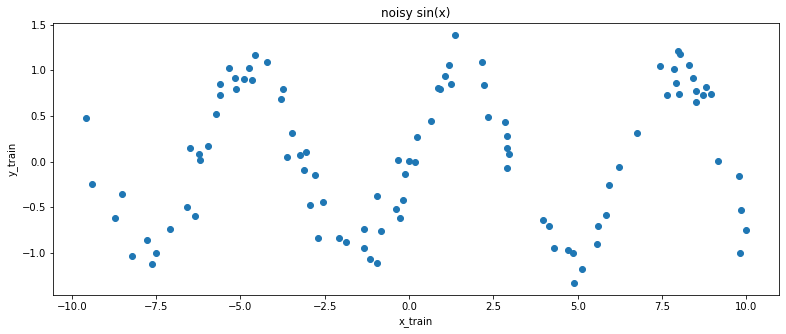

In [29]:
y_train = y_train + noise
plt.plot(x_train, y_train, 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [30]:
# make rows like columns
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 0.9415],
        [ 0.0453],
        [-0.6225],
        [ 0.2745],
        [ 1.1813],
        [ 0.9149],
        [ 0.2729],
        [-0.9433],
        [-0.7026],
        [ 0.7751],
        [ 0.8452],
        [-0.9985],
        [-0.8806],
        [ 1.0514],
        [ 1.0894],
        [-1.3237],
        [ 0.7256],
        [ 1.0897],
        [-0.0540],
        [ 0.6807],
        [ 0.4913],
        [-0.7341],
        [ 0.8888],
        [ 0.8385],
        [ 0.3096],
        [-0.3745],
        [-0.5945],
        [ 0.5230],
        [-0.9074],
        [-0.7441],
        [-0.4951],
        [-0.4151],
        [ 0.8134],
        [-0.3600],
        [ 1.0578],
        [-0.2466],
        [ 0.0204],
        [ 0.7424],
        [-0.0971],
        [ 0.9027],
        [-0.4788],
        [ 0.7245],
        [-0.9653],
        [ 0.0826],
        [-1.0317],
        [-0.6390],
        [-0.9991],
        [ 1.2136],
        [-0.8338],
        [ 0.3141],
        [ 1.0283],
        [ 0.1078],
        [ 0.

In [31]:
# example
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

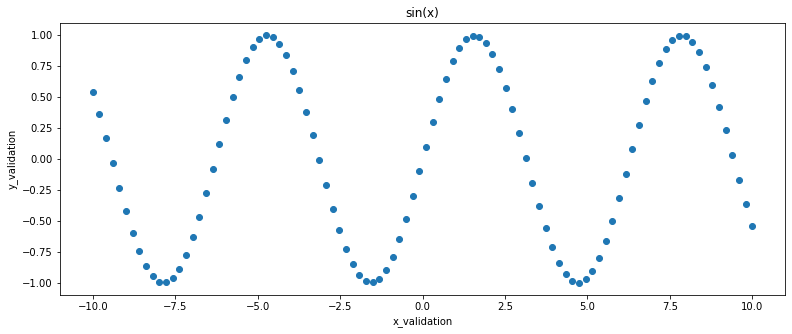

In [32]:
# just making like a normal sin(x), points are not random
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation, y_validation, 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [33]:
# we will have to make grid, so we need the same size. Двумерный тензор, где каждая строчка соотв одной точке
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [40]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)
sine_net

SineNet(
  (fc1): Linear(in_features=1, out_features=50, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)

In [35]:
# class SineNet(torch.nn.Module):
#     def __init__(self, n_hidden_neurons):
#         super(SineNet, self).__init__()
#         # put our code here
#         self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
#         self.act1 = torch.nn.Tanh()
#         self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.act2 = torch.nn.Tanh()
#         self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

#     def forward(self, x):
#         # put our code here
#         x = self.fc1(x)
#         x = self.act1(x)
#         x = self.fc2(x)
#         x = self.act2(x)
#         x = self.fc3(x)
#         return x


# sine_net = SineNet(20)
# sine_net.forward(torch.Tensor([1.]))

# print(sine_net)

# Prediction

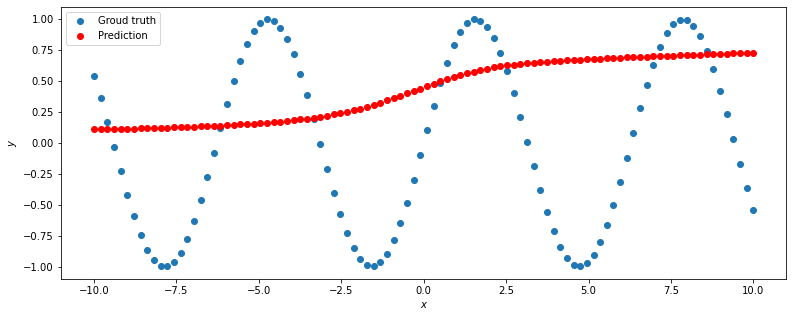

In [41]:
# already trying to predict. What if it works?
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [42]:
# SGD is not very good for this task
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [49]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

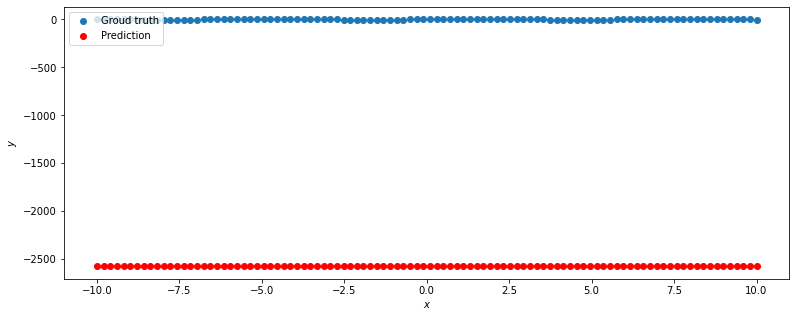

In [50]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)